In [144]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
import IPython.display as ipd
from IPython.display import Audio

%matplotlib inline 

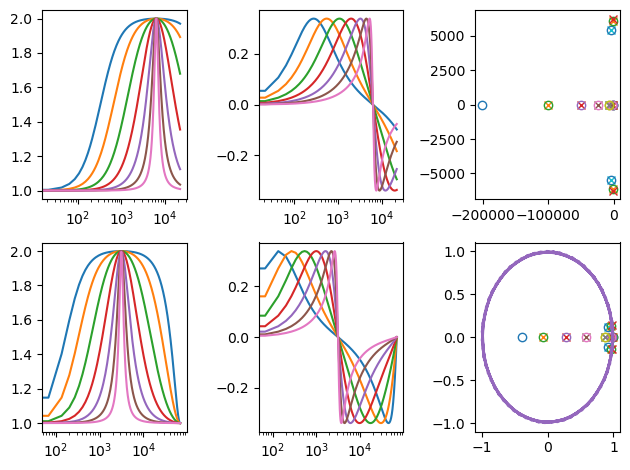

In [9]:
fs = 44100
NFFT = 1024
M = np.arange(-4,3)
# print(M)


plt.figure()
for n in M:
    Q = 2.**n
    wc = 2 * np.pi * 1000
    wc_prewarped = 2*fs*np.tan(wc/(2*fs))
    gamma = 2.
    b = np.array([1./(wc_prewarped*wc_prewarped), gamma/(Q*wc_prewarped), 1.])
    a = np.array([1./(wc_prewarped*wc_prewarped), 1.0/(Q*wc_prewarped), 1.])

    w, H = sig.freqs(b,a, worN=np.linspace(0, fs/2, NFFT))

    z = np.roots(b)
    p = np.roots(a)

    bz, az = sig.bilinear(b,a, fs)
    wz, Hz = sig.freqz(bz,az, worN=NFFT)

    zz = np.roots(bz)
    pz = np.roots(az)

    plt.subplot(2,3,1)
    plt.plot(w, (np.abs(H)))
    plt.xscale('log')

    plt.subplot(2,3,2)
    plt.plot(w, (np.angle(H)))
    plt.xscale('log')

    
    plt.subplot(2,3,3)
    plt.plot(np.real(z), np.imag(z), 'o', markerfacecolor="none")
    plt.plot(np.real(p), np.imag(p), 'x')

    plt.subplot(2,3,4)
    plt.plot(wz*fs/2, (np.abs(Hz)))
    plt.xscale('log')

    plt.subplot(2,3,5)
    plt.plot(wz*fs/2, (np.angle(Hz)))
    plt.xscale('log')

    
    plt.subplot(2,3,6)
    plt.plot(np.real(zz), np.imag(zz), 'o', markerfacecolor="none")
    plt.plot(np.real(pz), np.imag(pz), 'x')
    
plt.subplot(2,3,6)
M = 100
circx = np.sin(2*np.pi*np.linspace(0, 2*np.pi, M))
circy = np.cos(2*np.pi*np.linspace(0, 2*np.pi, M))
plt.plot(circx,circy)

plt.tight_layout()    
plt.show()


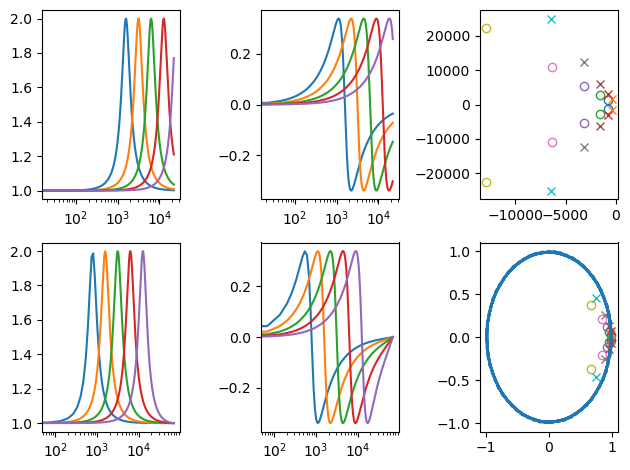

In [10]:
fs = 44100
NFFT = 1024
M = np.arange(-2,3)
# print(M)


plt.figure()
for n in M:
    Q = 2.
    wc = 2 * np.pi * 1000*2.**n
    wc_prewarped = 2*fs*np.tan(wc/(2*fs))
    gamma = 2.
    b = np.array([1./(wc_prewarped*wc_prewarped), gamma/(Q*wc_prewarped), 1.])
    a = np.array([1./(wc_prewarped*wc_prewarped), 1.0/(Q*wc_prewarped), 1.])

    w, H = sig.freqs(b,a, worN=np.linspace(0, fs/2, NFFT))

    z = np.roots(b)
    p = np.roots(a)

    bz, az = sig.bilinear(b,a, fs)
    wz, Hz = sig.freqz(bz,az, worN=NFFT)

    zz = np.roots(bz)
    pz = np.roots(az)

    plt.subplot(2,3,1)
    plt.plot(w, (np.abs(H)))
    plt.xscale('log')

    plt.subplot(2,3,2)
    plt.plot(w, (np.angle(H)))
    plt.xscale('log')

    
    plt.subplot(2,3,3)
    plt.plot(np.real(z), np.imag(z), 'o', markerfacecolor="none")
    plt.plot(np.real(p), np.imag(p), 'x')

    plt.subplot(2,3,4)
    plt.plot(wz*fs/2, (np.abs(Hz)))
    plt.xscale('log')

    plt.subplot(2,3,5)
    plt.plot(wz*fs/2, (np.angle(Hz)))
    plt.xscale('log')

    
    plt.subplot(2,3,6)
    plt.plot(np.real(zz), np.imag(zz), 'o', markerfacecolor="none")
    plt.plot(np.real(pz), np.imag(pz), 'x')
    
plt.subplot(2,3,6)
M = 100
circx = np.sin(2*np.pi*np.linspace(0, 2*np.pi, M))
circy = np.cos(2*np.pi*np.linspace(0, 2*np.pi, M))
plt.plot(circx,circy)

plt.tight_layout()    
plt.show()


In [139]:
class Filter(object):
    
    def __init__(self, fc=0.5, gain=1.0, q=1.0, fs=1, filterType='RBPF'):
        self.fc = fc
        self.gain = gain
        self.q = q
        self.fs = fs

        self.z1 = 0
        self.z2 = 0

        if filterType=='RBPF':
            self.B, self.A = self.designRBPF(self.fc, self.q, self.gain, self.fs)
        elif filterType=='LSF':
            self.B, self.A = self.designLSF(self.fc, self.gain, self.fs)
        elif filterType=='HSF':
            self.B, self.A = self.designHSF(self.fc, self.gain, self.fs)
  
    def designRBPF(self, fc, q, gain, fs):

        # convert center frequency to radians per second
        # TODO Question 1c: modify this line to prewarping the center frequency
        fc = 2 * np.pi * fc
        fc_prewarped = 2*fs*np.tan(fc/(2*fs))
        
        # analog filter coefficients for boost and cut
        if np.abs(gain) >= 1.:
            # TODO Question 1b: modify these lines to implement a parametric boost filter
            Bs = np.array([1./(fc_prewarped*fc_prewarped), gain/(q*fc_prewarped), 1.])
            As = np.array([1./(fc_prewarped*fc_prewarped), 1.0/(q*fc_prewarped), 1.])
        else:
            # TODO Question 1d: modify these lines to implement a parametric cut filter
            Bs = np.array([1./(fc_prewarped*fc_prewarped), 1.0/(q*fc_prewarped), 1.])
            As = np.array([1./(fc_prewarped*fc_prewarped), 1/(gain*q*fc_prewarped), 1.])

        # convert analog coefficients to digital coefficients using the bilinear transform
        Bz, Az = sig.bilinear(Bs, As, fs)

        # output are the digital coefficients for a parametric boost/cut filter
        return Bz, Az
    
    def designLSF(self, fc, gain, fs):

        # convert center frequency to radians per second
        # TODO Question 2a:  make sure to prewarp your cutoff frequency
        fc = 2 * np.pi * fc
        fc_prewarped = 2*fs*np.tan(fc/(2*fs))

        # TODO Question 2a: modify these lines to implement a 1st order low shelf filter
        Bs = np.array([0, 1/fc_prewarped, gain])
        As = np.array([0, 1/fc_prewarped, 1.])

        Bz, Az = sig.bilinear(Bs, As, fs)
        
        return Bz, Az
    
    def designHSF(self, fc, gain, fs):

        # convert center frequency to radians per second
        # TODO Question 2b:  make sure to prewarp your cutoff frequency
        fc = 2 * np.pi * fs
        fc_prewarped = 2*fs*np.tan(fc/(2*fs))

        # TODO Question 2b: modify these lines to implement a 1st order high shelf filter
        Bs = np.array([0, gain/fc_prewarped, 1.])
        As = np.array([0, 1/fc_prewarped, 1.])

        Bz, Az = sig.bilinear(Bs, As, fs)
        
        return Bz, Az
    
    def process(self, input):
        output = np.zeros(np.size(input))
        for i in np.arange(0, np.size(input), 1):
            # TODO Question 1b: implement code to apply a biquad filter. 
            # Note: there is probably a better way to ensure each sample is
            #       a sample and not an array, but I'm not a python expert
            #       and the np.ndarray.item call seemed to work
            output[i] = np.ndarray.item(self.z1 + self.B[0]*input[i])
            self.z1 = np.ndarray.item(self.z2 + self.B[1]*input[i] - self.A[1]*output[i])
            self.z2 = np.ndarray.item(self.B[2]*input[i] - self.A[2]*output[i])
        return output

    def reset(self):
        # reset the state of the filter by zeroing out the past output samples
        self.z1 = 0
        self.z2 = 0

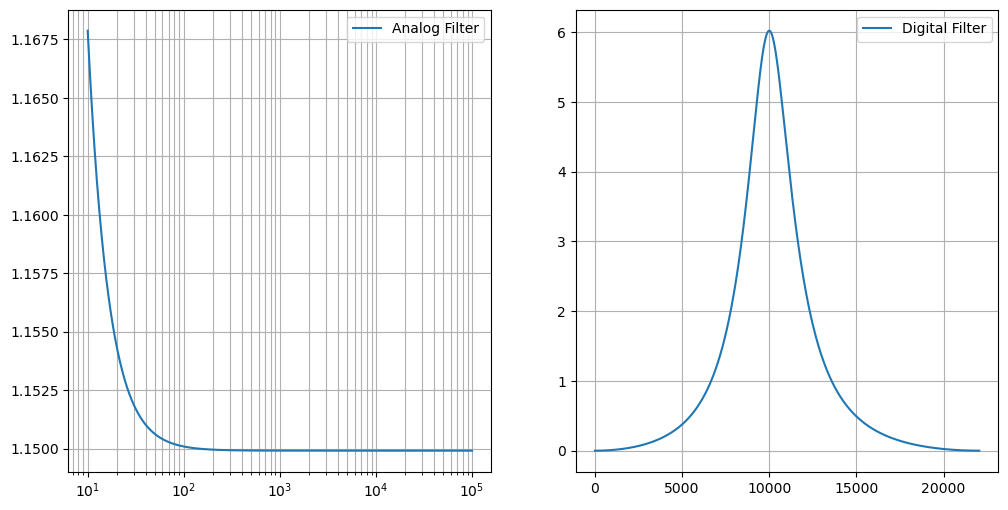

In [149]:
rbpf_filter = Filter(fc=10000, q=3, gain=2, fs=44100, filterType='RBPF' )
w_analog, H_analog = sig.freqs(rbpf_filter.B, rbpf_filter.A, worN=np.logspace(1, 5, 1000))
w_digital, H_digital = sig.freqz(rbpf_filter.B, rbpf_filter.A, worN=np.linspace(0, np.pi, 1000))

plt.figure(figsize=(12,6))

#analog filter
plt.subplot(1,2,1)
plt.semilogx(w_analog, 20*np.log10(abs(H_analog)), label='Analog Filter')
plt.grid(which= 'both', axis='both')
plt.legend()

#digital filter
plt.subplot(1,2,2)
frequencies_digital= w_digital*fs/(2*np.pi)
plt.plot(frequencies_digital, 20*np.log10(abs(H_digital)), label='Digital Filter')
plt.grid(which= 'both', axis='both')
plt.legend()


In [140]:
fs = 48000 

# generate an implse to test our filter
#input = np.zeros([2**14,1])
#input[0] = 1.

# # instead load an audio file (note: this potentially overrides the sample rate we set)
gtr, fs = sf.read(r"C:\Users\Devyani Hebbar\Downloads\MPATE2607_hw1\MPATE2607_hw1\noisy.wav")
input = np.zeros((np.size(gtr),1))
input[:,0] = gtr

# instatiate a parametric boost filter
rlpf = Filter(fc=5000, q=3, gain=2, fs=44100, filterType='RBPF')   


# get the output of our filter given some input

modified_gtr = rlpf.process(input)

In [141]:
Audio(gtr, rate = sampleRate)

In [142]:
Audio(modified_gtr, rate = sampleRate)

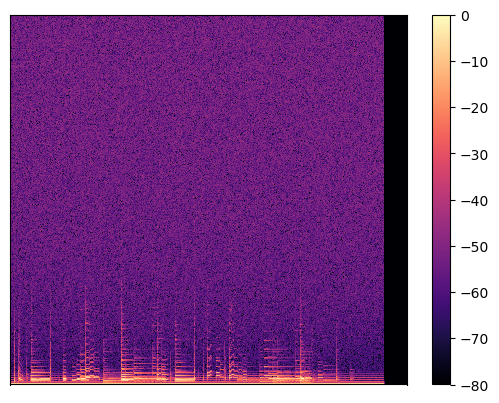

In [106]:
import librosa
input_stft = librosa.stft(gtr)  
input_stft_db = librosa.amplitude_to_db(np.abs(input_stft), ref=np.max)
plt.figure()
librosa.display.specshow(input_stft_db)
plt.colorbar()

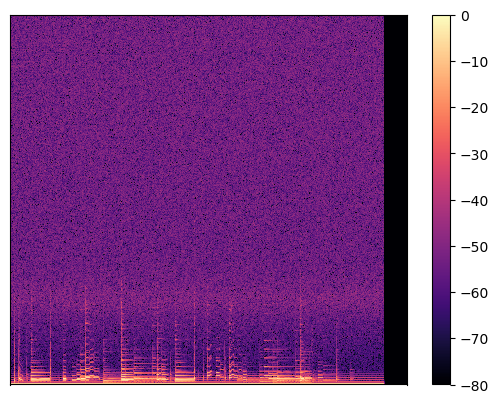

In [107]:
import librosa
input_stft = librosa.stft(modified_gtr)  
input_stft_db = librosa.amplitude_to_db(np.abs(input_stft), ref=np.max)
plt.figure()
librosa.display.specshow(input_stft_db)
plt.colorbar()